In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강 및 정규화 (rescale=1./255)
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2  # 80% 학습, 20% 검증
)

# 데이터 로드
train_generator = datagen.flow_from_directory(
    "./data/price_patterns",  # 이 폴더 내에서만 학습 데이터 로드
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    "./data/price_patterns",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

# CNN 모델 구성 (입력 크기 지정)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 0: 하락 패턴, 1: 상승 패턴
])

# 모델 컴파일 (Adam 최적화)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

# 모델 저장
model.save("pattern_classification_model.h5")
print("패턴 분류 모델 학습 완료 및 저장!")

Found 25430 images belonging to 2 classes.
Found 6357 images belonging to 2 classes.
Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


795/795 ━━━━━━━━━━━━━━━━━━━━ 1080s 1s/step - accuracy: 0.5071 - loss: 0.7299 - val_accuracy: 0.5112 - val_loss: 0.6929
Epoch 2/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 681s 853ms/step - accuracy: 0.5109 - loss: 0.6930 - val_accuracy: 0.5112 - val_loss: 0.6929
Epoch 3/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 636s 798ms/step - accuracy: 0.5149 - loss: 0.6929 - val_accuracy: 0.5112 - val_loss: 0.6930
Epoch 4/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 652s 818ms/step - accuracy: 0.5079 - loss: 0.6931 - val_accuracy: 0.5112 - val_loss: 0.6929
Epoch 5/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 677s 849ms/step - accuracy: 0.5122 - loss: 0.6928 - val_accuracy: 0.5112 - val_loss: 0.6929
Epoch 6/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 817s 1s/step - accuracy: 0.5076 - loss: 0.6931 - val_accuracy: 0.5112 - val_loss: 0.6929
Epoch 7/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 810s 1s/step - accuracy: 0.5147 - loss: 0.6928 - val_accuracy: 0.5112 - val_loss: 0.6929
Epoch 8/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 784s 983ms/step - accuracy: 0.5154 - loss: 0.6928 - val

패턴 분류 모델 학습 완료 및 저장!


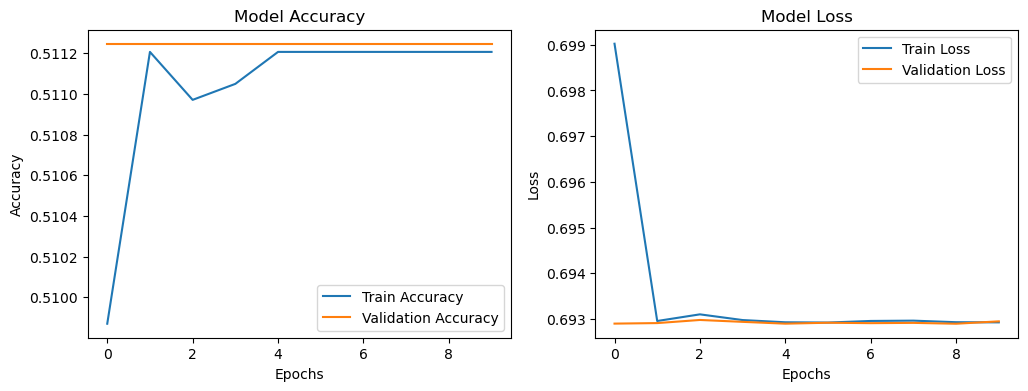

In [5]:
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실(loss) 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [13]:
# 학습된 모델 불러오기
import tensorflow as tf

model = tf.keras.models.load_model("pattern_classification_model.h5")

# 모델 평가 (검증 데이터셋)
loss, accuracy = model.evaluate(validation_generator)

print(f"모델 평가 결과")
print(f"손실(loss): {loss:.4f}")
print(f"정확도(accuracy): {accuracy:.4f}")

203/203 ━━━━━━━━━━━━━━━━━━━━ 156s 763ms/step - accuracy: 0.9934 - loss: 0.0198
📊 모델 평가 결과
🔹 손실(loss): 0.0227
🔹 정확도(accuracy): 0.9923


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

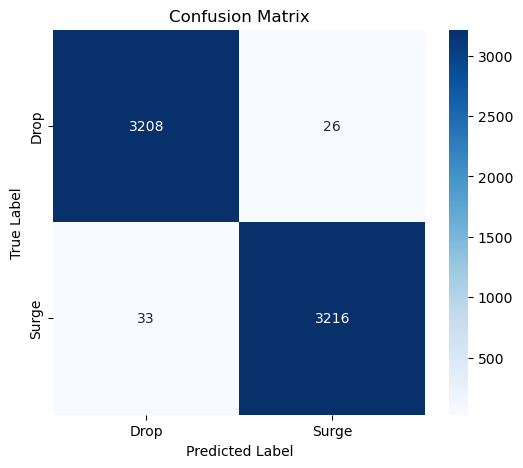

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 실제 레이블과 예측값 수집
true_labels = []
pred_labels = []

for _ in range(len(validation_generator)):
    x, y = validation_generator.__next__()
    preds = model.predict(x)
    true_labels.extend(y)  # 실제 정답
    pred_labels.extend((preds > 0.5).astype(int).flatten())  # 0.5 이상이면 상승(1), 아니면 하락(0)

# 혼동 행렬 생성
cm = confusion_matrix(true_labels, pred_labels)

# 혼동 행렬 시각화
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Drop', 'Surge'], yticklabels=['Drop', 'Surge'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


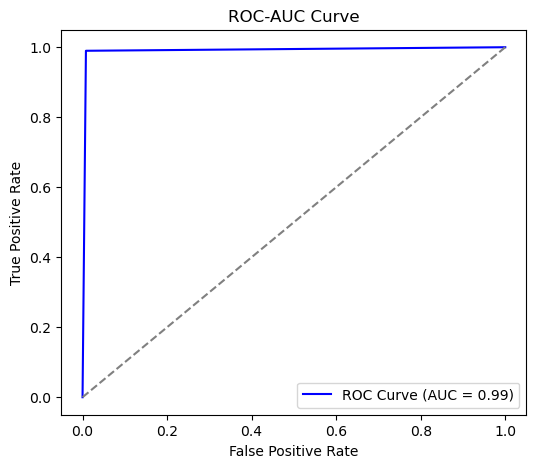

In [18]:
from sklearn.metrics import roc_curve, auc

# ✅ ROC Curve 계산
fpr, tpr, _ = roc_curve(true_labels, pred_labels)
roc_auc = auc(fpr, tpr)

# ✅ ROC Curve 시각화
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 랜덤 예측 기준선
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

In [29]:
# 최근 1년 간 상승패턴 이미지 이용 테스트

import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import csv

# 학습된 모델 불러오기
model = tf.keras.models.load_model("pattern_classification_model.h5")

# 테스트할 이미지 폴더 (최근 1년 상승 패턴)
test_dir = "./data/price_surge_patterns_test"

# 테스트할 이미지 리스트 가져오기
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

# 배치 크기 설정 (최적 속도를 위해 한 번에 여러 개 처리)
batch_size = 32  
image_batches = [image_files[i:i+batch_size] for i in range(0, len(image_files), batch_size)]

# 예측 수행 (배치 단위)
success = 0
fail = 0
predictions = []

for batch in image_batches:
    batch_images = []
    batch_names = []

    for img_file in batch:
        img_path = os.path.join(test_dir, img_file)

        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array /= 255.0  # 정규화
        batch_images.append(img_array)
        batch_names.append(img_file)

    batch_images = np.array(batch_images)  # numpy 배열 변환 (배치 입력)

    # 모델 예측
    batch_preds = model.predict(batch_images)

    for img_name, pred in zip(batch_names, batch_preds):
        result = "surge_pattern" if pred[0] > 0.5 else "drop_pattern"
        success += 1 if pred[0] > 0.5 else 0
        fail += 1 if pred[0] <= 0.5 else 0
        predictions.append([img_name, result])

# 최종 성공 & 실패 개수 출력
print(f"success: {success}, fail: {fail}")

# CSV 파일로 예측 결과 저장
output_csv = "surge_pattern_test_results.csv"
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "Prediction"])  # 헤더 추가
    writer.writerows(predictions)

print(f"예측 결과가 {output_csv} 파일에 저장되었습니다!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [27]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("surge_pattern_test_results.csv")

# 예측된 상승/하락 패턴 개수 출력
print(df["Prediction"].value_counts())

# 잘못 예측된 이미지 확인
incorrect_preds = df[df["Prediction"] == "drop_pattern"]
print("상승 패턴인데 하락으로 잘못 예측한 이미지들:")
print(incorrect_preds)

Prediction
surge_pattern    1309
drop_pattern        5
Name: count, dtype: int64
상승 패턴인데 하락으로 잘못 예측한 이미지들:
                   Image    Prediction
90   APTV_2025-02-04.png  drop_pattern
91   APTV_2025-02-06.png  drop_pattern
565   HRL_2024-09-05.png  drop_pattern
656  KLAC_2024-09-26.png  drop_pattern
712   MAR_2024-11-06.png  drop_pattern


In [53]:
# 최근 1년 간 하락패턴 이미지 이용 테스트

import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import csv

# 학습된 모델 불러오기
model = tf.keras.models.load_model("pattern_classification_model.h5")

# 테스트할 이미지 폴더 (최근 1년 상승 패턴)
test_dir = "./data/price_drop_patterns_test"

# 테스트할 이미지 리스트 가져오기
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

# 배치 크기 설정 (최적 속도를 위해 한 번에 여러 개 처리)
batch_size = 32  
image_batches = [image_files[i:i+batch_size] for i in range(0, len(image_files), batch_size)]

# 예측 수행 (배치 단위)
success = 0
fail = 0
predictions = []

for batch in image_batches:
    batch_images = []
    batch_names = []

    for img_file in batch:
        img_path = os.path.join(test_dir, img_file)

        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array /= 255.0  # 정규화
        batch_images.append(img_array)
        batch_names.append(img_file)

    batch_images = np.array(batch_images)  # numpy 배열 변환 (배치 입력)

    # 모델 예측
    batch_preds = model.predict(batch_images)

    for img_name, pred in zip(batch_names, batch_preds):
        result = "surge_pattern" if pred[0] > 0.5 else "drop_pattern"
        success += 1 if pred[0] < 0.5 else 0
        fail += 1 if pred[0] >= 0.5 else 0
        predictions.append([img_name, result])

# 최종 성공 & 실패 개수 출력
print(f"success: {success}, fail: {fail}")

# CSV 파일로 예측 결과 저장
output_csv = "drop_pattern_test_results.csv"
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "Prediction"])  # 헤더 추가
    writer.writerows(predictions)

print(f"예측 결과가 {output_csv} 파일에 저장되었습니다!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281

In [25]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("drop_pattern_test_results.csv")

# 예측된 상승/하락 패턴 개수 출력
print(df["Prediction"].value_counts())

# 잘못 예측된 이미지 확인
incorrect_preds = df[df["Prediction"] == "surge_pattern"]
print("상승 패턴인데 하락으로 잘못 예측한 이미지들:")
print(incorrect_preds)

Prediction
drop_pattern     1444
surge_pattern       1
Name: count, dtype: int64
상승 패턴인데 하락으로 잘못 예측한 이미지들:
                 Image     Prediction
429  EA_2025-01-23.png  surge_pattern


📈 상승 패턴: 502개
📉 하락 패턴: 1개
📄 예측 결과가 'today_results.csv'에 저장되었습니다!


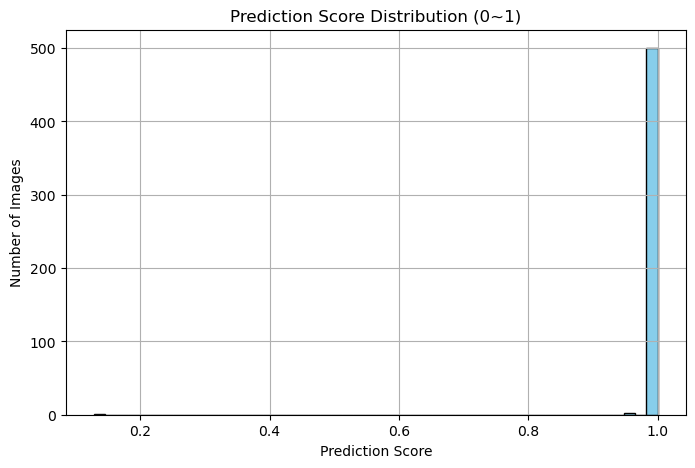

In [227]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import csv
import matplotlib.pyplot as plt

# 학습된 모델 불러오기
model = tf.keras.models.load_model("pattern_classification_model.h5")

# 테스트할 이미지 폴더 (오늘 데이터)
test_dir = "./data/recent"

# 이미지 리스트 가져오기
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

# 배치 크기 설정
batch_size = 32  
image_batches = [image_files[i:i+batch_size] for i in range(0, len(image_files), batch_size)]

# 예측 수행
surge = 0
drop = 0
predictions = []
prediction_scores = []  # ✅ 예측 점수 저장용

for batch in image_batches:
    batch_images = []
    batch_names = []

    for img_file in batch:
        img_path = os.path.join(test_dir, img_file)

        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0  # 정규화
        batch_images.append(img_array)
        batch_names.append(img_file)

    batch_images = np.array(batch_images)

    # 모델 예측
    batch_preds = model.predict(batch_images, verbose=0)

    for img_name, pred in zip(batch_names, batch_preds):
        score = pred[0]
        result = "surge_pattern" if score > 0.5 else "drop_pattern"
        surge += 1 if score > 0.5 else 0
        drop += 1 if score <= 0.5 else 0
        predictions.append([img_name, result])
        prediction_scores.append(score)  # ✅ 점수 저장

# 결과 출력
print(f"📈 상승 패턴: {surge}개")
print(f"📉 하락 패턴: {drop}개")

# CSV 저장
output_csv = "today_results.csv"
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "Prediction"])
    writer.writerows(predictions)

print(f"📄 예측 결과가 '{output_csv}'에 저장되었습니다!")

# ✅ 시각화
plt.figure(figsize=(8, 5))
plt.hist(prediction_scores, bins=50, color='skyblue', edgecolor='black')
plt.title("Prediction Score Distribution (0~1)")
plt.xlabel("Prediction Score")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tqdm import tqdm

# ✅ 모델 불러오기
model = load_model("pattern_classification_model.h5")

# ✅ 테스트 이미지 폴더 경로
test_dir = "./data/test_patterns"

# ✅ 이미지 목록 불러오기
image_files = [f for f in os.listdir(test_dir) if f.endswith('.png')]

# ✅ 예측 결과 저장
prediction_scores = []

# ✅ tqdm으로 예측 진행 상황 표시
for img_file in tqdm(image_files, desc="예측 진행 중"):
    img_path = os.path.join(test_dir, img_file)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    pred = model.predict(img_array, verbose=0)
    prediction_scores.append(pred[0][0])

# ✅ 시각화
plt.figure(figsize=(8, 5))
plt.hist(prediction_scores, bins=50, color='skyblue', edgecolor='black')
plt.title("Prediction Score Distribution (0~1)")
plt.xlabel("Prediction Score")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 186.2 kB/s eta 0:03:32
   ---------------------------------------- 0.0/39.5 MB 163.4 kB/s eta 0:04:02
   ---------------------------------------- 0.1/39.5 MB 217.9 kB/s eta 0:03:01
   ---------------------------------------- 0.1/39.5 MB 308.0 kB/s eta 0:02:08
   ---------------------------------------- 0.1/39.5 MB 343.4 kB/s eta 0:01:55
   ---------------------------------------- 0.2/39.5 MB 382.3 kB/s eta 0:01:43
   ---------------------------------

✅ Functional 모델 재구성 완료
✅ 마지막 Conv 레이어: conv2d_11
📊 예측 score: 0.1377
📉 하락 패턴으로 분류되었습니다!


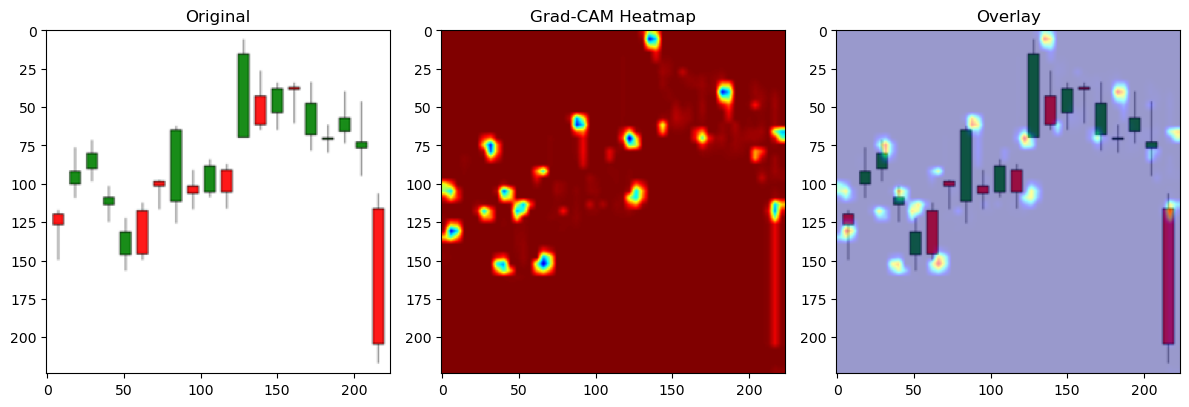

In [5]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1️⃣ 학습된 Sequential 모델 로드
seq_model = tf.keras.models.load_model("pattern_classification_model.h5")

# 2️⃣ Functional 모델로 변환 (가중치 복사 포함)
inputs = tf.keras.Input(shape=(224, 224, 3))
x = inputs
for layer in seq_model.layers:
    cloned_layer = tf.keras.models.clone_model(layer)
    cloned_layer.set_weights(layer.get_weights())  # ✅ 가중치 복사!
    x = cloned_layer(x)
functional_model = tf.keras.Model(inputs=inputs, outputs=x)
print("✅ Functional 모델 재구성 완료")

# 3️⃣ 마지막 Conv 레이어 탐색
last_conv_layer_name = next(
    layer.name for layer in reversed(functional_model.layers)
    if isinstance(layer, tf.keras.layers.Conv2D)
)
print(f"✅ 마지막 Conv 레이어: {last_conv_layer_name}")

# 4️⃣ Grad-CAM 함수
def apply_gradcam(img_path, model, last_conv_layer_name):
    # ✅ 이미지 전처리
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # ✅ Grad-CAM 서브모델 구성
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # ✅ Gradient 계산
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array, training=False)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    # ✅ 예측 결과 출력
    score = predictions[0][0].numpy()
    print(f"📊 예측 score: {score:.4f}")
    if score > 0.5:
        print("📈 상승 패턴으로 분류되었습니다!")
    else:
        print("📉 하락 패턴으로 분류되었습니다!")

    # ✅ Heatmap 계산
    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap) + 1e-8  # 안정성 확보

    # ✅ 시각화
    img_cv = cv2.imread(img_path)
    img_cv = cv2.resize(img_cv, (224, 224))
    heatmap = cv2.resize(heatmap.numpy(), (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img_cv, 0.6, heatmap_color, 0.4, 0)

    # ✅ 출력
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    plt.title("Original")

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_color)
    plt.title("Grad-CAM Heatmap")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.title("Overlay")

    plt.tight_layout()
    plt.show()

# 5️⃣ 실행
test_img_path = "./data/what1.png"  # 테스트할 이미지 경로
apply_gradcam(test_img_path, functional_model, last_conv_layer_name)

✅ Functional 모델 재구성 완료
✅ 마지막 Conv 레이어: conv2d_11
📊 예측 score: 1.0000
📈 상승 패턴으로 분류되었습니다!


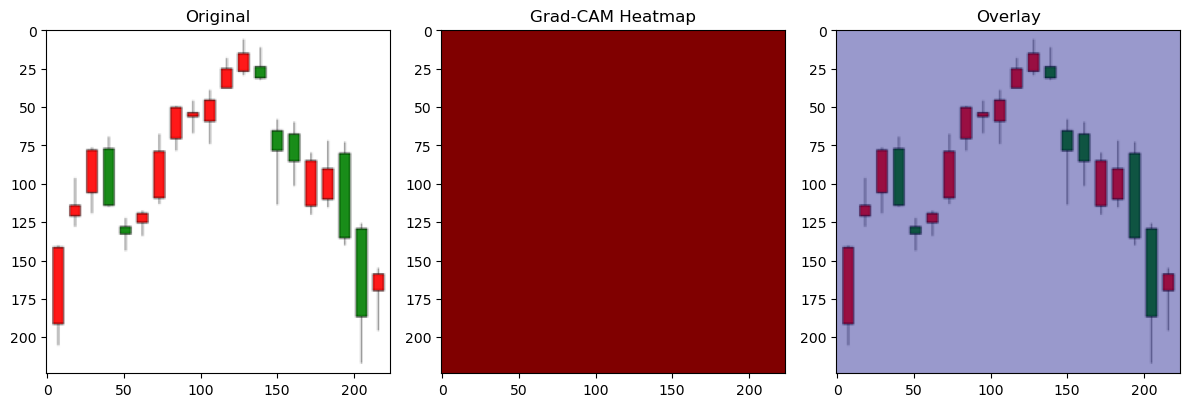

In [11]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1️⃣ 학습된 Sequential 모델 로드
seq_model = tf.keras.models.load_model("pattern_classification_model_v1.h5")

# 2️⃣ Functional 모델로 변환 (가중치 복사 포함)
inputs = tf.keras.Input(shape=(224, 224, 3))
x = inputs
for layer in seq_model.layers:
    cloned_layer = tf.keras.models.clone_model(layer)
    cloned_layer.set_weights(layer.get_weights())  # ✅ 가중치 복사!
    x = cloned_layer(x)
functional_model = tf.keras.Model(inputs=inputs, outputs=x)
print("✅ Functional 모델 재구성 완료")

# 3️⃣ 마지막 Conv 레이어 탐색
last_conv_layer_name = next(
    layer.name for layer in reversed(functional_model.layers)
    if isinstance(layer, tf.keras.layers.Conv2D)
)
print(f"✅ 마지막 Conv 레이어: {last_conv_layer_name}")

# 4️⃣ Grad-CAM 함수
def apply_gradcam(img_path, model, last_conv_layer_name):
    # ✅ 이미지 전처리
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # ✅ Grad-CAM 서브모델 구성
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # ✅ Gradient 계산
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array, training=False)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    # ✅ 예측 결과 출력
    score = predictions[0][0].numpy()
    print(f"📊 예측 score: {score:.4f}")
    if score > 0.5:
        print("📈 상승 패턴으로 분류되었습니다!")
    else:
        print("📉 하락 패턴으로 분류되었습니다!")

    # ✅ Heatmap 계산
    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= tf.math.reduce_max(heatmap) + 1e-8  # 안정성 확보

    # ✅ 시각화
    img_cv = cv2.imread(img_path)
    img_cv = cv2.resize(img_cv, (224, 224))
    heatmap = cv2.resize(heatmap.numpy(), (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img_cv, 0.6, heatmap_color, 0.4, 0)

    # ✅ 출력
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    plt.title("Original")

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_color)
    plt.title("Grad-CAM Heatmap")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.title("Overlay")

    plt.tight_layout()
    plt.show()

# 5️⃣ 실행
test_img_path = "./data/ABBV_2016-01-13.png"  # 테스트할 이미지 경로
apply_gradcam(test_img_path, functional_model, last_conv_layer_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


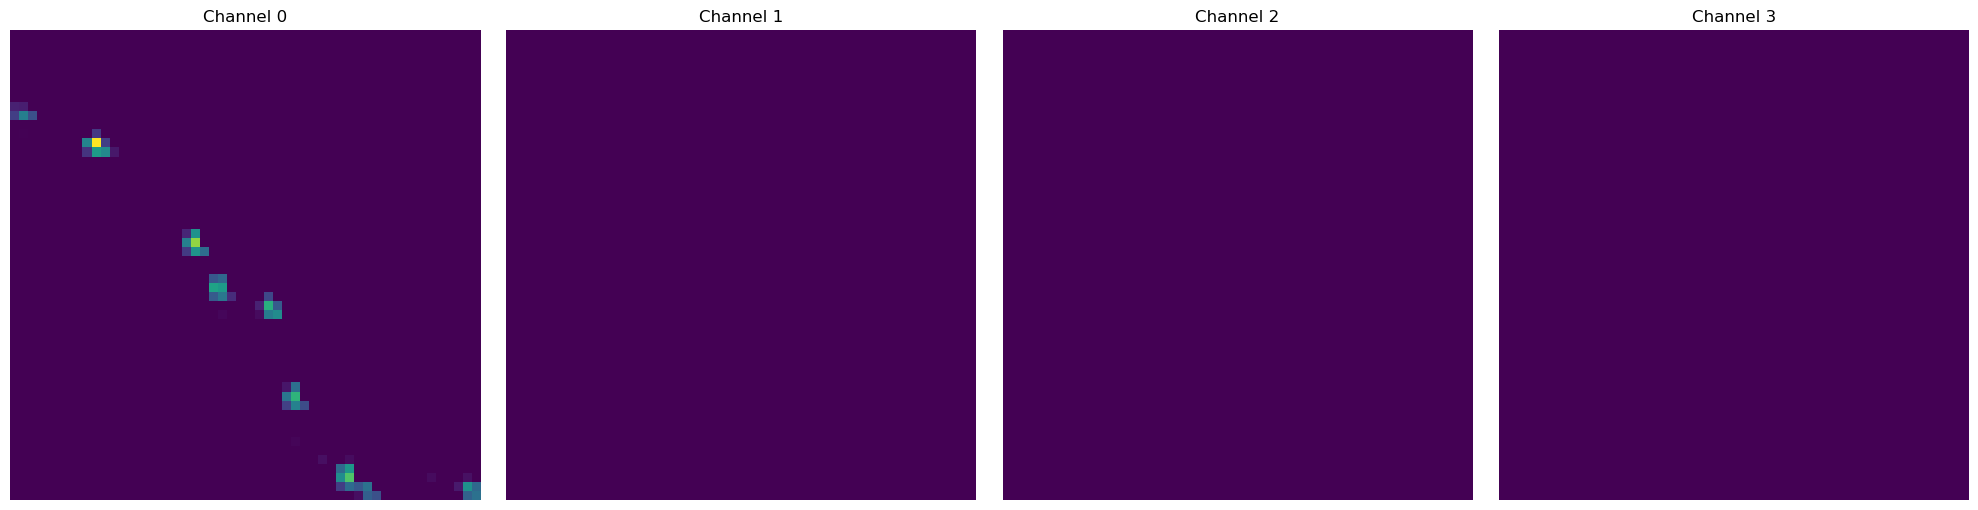

In [197]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# 모델 로드
model = tf.keras.models.load_model("pattern_classification_model.h5")

# 테스트 이미지 경로
img_path = "./data/what.png"

# 이미지 전처리
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# 마지막 Conv 레이어 찾기
last_conv_layer_name = next(
    layer.name for layer in reversed(model.layers)
    if isinstance(layer, tf.keras.layers.Conv2D)
)

# 해당 Conv 레이어 출력만 따로 추출하는 모델
activation_model = tf.keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(last_conv_layer_name).output
)

# 활성화 맵 추출
activations = activation_model.predict(img_array)

# 앞의 4개 채널만 시각화
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
    ax = axes[i]
    ax.imshow(activations[0, :, :, i], cmap='viridis')
    ax.set_title(f"Channel {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [211]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# ✅ 모델 로드 및 Functional 모델로 변환
seq_model = tf.keras.models.load_model("pattern_classification_model.h5")
inputs = tf.keras.Input(shape=(224, 224, 3))
x = inputs
for layer in seq_model.layers:
    x = layer(x)
model = tf.keras.Model(inputs=inputs, outputs=x)

# ✅ Dummy input으로 한 번 호출 (내부 노드 연결을 명시적으로 생성)
_ = model(np.zeros((1, 224, 224, 3), dtype=np.float32))

# ✅ 마지막 Conv 레이어 이름 찾기
last_conv_layer_name = next(
    layer.name for layer in reversed(model.layers)
    if isinstance(layer, tf.keras.layers.Conv2D)
)
print(f"✅ 마지막 Conv 레이어: {last_conv_layer_name}")

# ✅ 이미지 경로
img_path = "./data/what.png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ✅ Grad-CAM 모델 구성
grad_model = tf.keras.Model(
    inputs=model.input,
    outputs=[model.get_layer(last_conv_layer_name).output, model.output]
)

# ✅ Grad-CAM 계산
with tf.GradientTape() as tape:
    conv_output, predictions = grad_model(img_array)
    class_idx = tf.argmax(predictions[0])
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_output)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
conv_output = conv_output[0]
heatmap = tf.reduce_sum(conv_output * pooled_grads, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= tf.math.reduce_max(heatmap) + 1e-8
heatmap_resized = cv2.resize(heatmap.numpy(), (224, 224))

# ✅ Conv Activation Map (상위 4개 채널)
activations = conv_output.numpy()
top_channels = np.argsort(np.mean(activations, axis=(0, 1)))[-4:]

# ✅ 원본 이미지 로딩
img_cv = cv2.imread(img_path)
img_cv = cv2.resize(img_cv, (224, 224))
overlay = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
overlayed = cv2.addWeighted(img_cv, 0.6, overlay, 0.4, 0)

# ✅ 시각화
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(heatmap_resized, cmap="jet")
plt.title("Grad-CAM Heatmap")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(overlayed, cv2.COLOR_BGR2RGB))
plt.title("Overlay")
plt.axis("off")

# 활성화 채널 시각화
for i, ch in enumerate(top_channels):
    plt.subplot(2, 4, 5 + i)
    plt.imshow(activations[:, :, ch], cmap="viridis")
    plt.title(f"Channel {ch}")
    plt.axis("off")

plt.tight_layout()
plt.show()

✅ 마지막 Conv 레이어: conv2d_11


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m2800388338224\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=array([[[[1., 1., 1.],\n         [1., 1., 1.],\n         [1., 1., 1.],\n         ...,\n         [1., 1., 1.],\n         [1., 1., 1.],\n         [1., 1., 1.]],\n\n        [[1., 1., 1.],\n         [1., 1., 1.],\n         [1., 1., 1.],\n         ...,\n         [1., 1., 1.],\n         [1., 1., 1.],\n         [1., 1., 1.]],\n\n        [[1., 1., 1.],\n         [1., 1., 1.],\n         [1., 1., 1.],\n         ...,\n         [1., 1., 1.],\n         [1., 1., 1.],\n         [1., 1., 1.]],\n\n        ...,\n\n        [[1., 1., 1.],\n         [1., 1., 1.],\n         [1., 1., 1.],\n         ...,\n         [1., 1., 1.],\n         [1., 1., 1.],\n         [1., 1., 1.]],\n\n        [[1., 1., 1.],\n         [1., 1., 1.],\n         [1., 1., 1.],\n         ...,\n         [1., 1., 1.],\n         [1., 1., 1.],\n         [1., 1., 1.]],\n\n        [[1., 1., 1.],\n         [1., 1., 1.],\n         [1., 1., 1.],\n         ...,\n         [1., 1., 1.],\n         [1., 1., 1.],\n         [1., 1., 1.]]]], dtype=float32)\n  • training=None\n  • mask=None'